**Without Scaling performance of NN**

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
df = pd.read_csv('/content/Social_Network_Ads.csv')

In [ ]:
df = df.iloc[:,2:]
df.head()

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


In [ ]:
import seaborn as sns

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


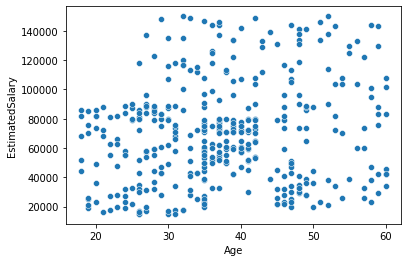

In [ ]:
sns.scatterplot(df.iloc[:,0],df.iloc[:,1])

In [ ]:
X = df.iloc[:,0:2]
y = df.iloc[:,-1]

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense

In [ ]:
model = Sequential()

model.add(Dense(128,activation='relu',input_dim=2))
model.add(Dense(1,activation='sigmoid'))

In [ ]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 128)               384       
                                                                 
 dense_2 (Dense)             (None, 1)                 129       
                                                                 
Total params: 513
Trainable params: 513
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
history = model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=100)

Epoch 1/100
10/10 [==============================] - 1s 42ms/step - loss: 6689.0693 - accuracy: 0.3469 - val_loss: 3588.6782 - val_accuracy: 0.4000
Epoch 2/100
10/10 [==============================] - 0s 9ms/step - loss: 1788.8799 - accuracy: 0.3719 - val_loss: 828.2932 - val_accuracy: 0.6000
Epoch 3/100
10/10 [==============================] - 0s 9ms/step - loss: 961.7184 - accuracy: 0.6531 - val_loss: 824.4434 - val_accuracy: 0.6000
Epoch 4/100
10/10 [==============================] - 0s 8ms/step - loss: 325.9465 - accuracy: 0.4344 - val_loss: 68.8772 - val_accuracy: 0.4000
Epoch 5/100
10/10 [==============================] - 0s 9ms/step - loss: 105.6520 - accuracy: 0.5188 - val_loss: 5.7623 - val_accuracy: 0.6000
Epoch 6/100
10/10 [==============================] - 0s 8ms/step - loss: 19.1263 - accuracy: 0.5406 - val_loss: 17.4829 - val_accuracy: 0.4000
Epoch 7/100
10/10 [==============================] - 0s 8ms/step - loss: 20.7027 - accuracy: 0.5312 - val_loss: 33.1314 - val_accur

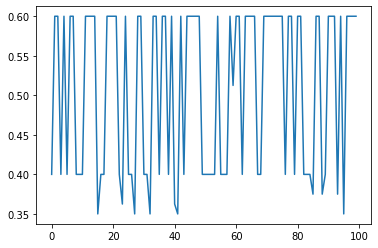

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['val_accuracy'])

**With scaling performance of NN**

In [ ]:
# Applying scaling

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
X_train_scaled

array([[ 0.88928823, -0.65924556],
       [-0.17254846,  0.87392651],
       [-1.04132394, -0.36440478],
       [ 0.98581884,  0.6085698 ],
       [-0.94479333,  0.57908572],
       [ 0.40663519,  0.01888824],
       [ 0.98581884,  2.11225779],
       [ 0.31010458, -0.30543662],
       [ 1.7580637 , -0.27595254],
       [-0.17254846,  2.20071003],
       [ 1.7580637 ,  1.0213469 ],
       [-1.33091576, -1.48479975],
       [ 2.04765553,  0.54960165],
       [ 1.27541066,  1.90586924],
       [-1.13785454,  0.31372902],
       [-0.36560968, -0.77718187],
       [-1.71703819,  0.49063349],
       [-0.5586709 , -1.51428383],
       [ 0.31010458, -0.71821372],
       [ 0.02051275, -0.57079333],
       [ 0.02051275,  0.04837232],
       [-0.07601785, -0.51182517],
       [-0.6552015 , -1.51428383],
       [ 0.02051275,  0.31372902],
       [ 0.31010458,  0.07785639],
       [-0.46214029, -1.13099081],
       [-0.75173211, -1.54376791],
       [-0.26907907, -0.65924556],
       [-1.13785454,

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


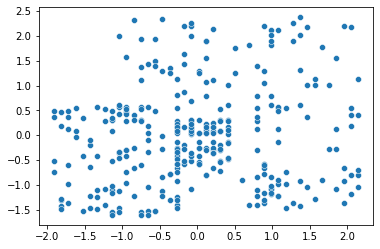

In [ ]:
sns.scatterplot(X_train_scaled[:,0],X_train_scaled[:,1])

In [ ]:
model = Sequential()

model.add(Dense(128,activation='relu',input_dim=2))
model.add(Dense(1,activation='sigmoid'))

model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

history = model.fit(X_train_scaled,y_train,validation_data=(X_test_scaled,y_test),epochs=100)

Epoch 1/100
10/10 [==============================] - 2s 78ms/step - loss: 0.6879 - accuracy: 0.5437 - val_loss: 0.6411 - val_accuracy: 0.7875
Epoch 2/100
10/10 [==============================] - 0s 9ms/step - loss: 0.6250 - accuracy: 0.7875 - val_loss: 0.5815 - val_accuracy: 0.8375
Epoch 3/100
10/10 [==============================] - 0s 8ms/step - loss: 0.5747 - accuracy: 0.8375 - val_loss: 0.5304 - val_accuracy: 0.8750
Epoch 4/100
10/10 [==============================] - 0s 11ms/step - loss: 0.5297 - accuracy: 0.8469 - val_loss: 0.4881 - val_accuracy: 0.8750
Epoch 5/100
10/10 [==============================] - 0s 8ms/step - loss: 0.4913 - accuracy: 0.8562 - val_loss: 0.4532 - val_accuracy: 0.8625
Epoch 6/100
10/10 [==============================] - 0s 7ms/step - loss: 0.4592 - accuracy: 0.8625 - val_loss: 0.4235 - val_accuracy: 0.8625
Epoch 7/100
10/10 [==============================] - 0s 9ms/step - loss: 0.4317 - accuracy: 0.8719 - val_loss: 0.3989 - val_accuracy: 0.8500
Epoch 8/100

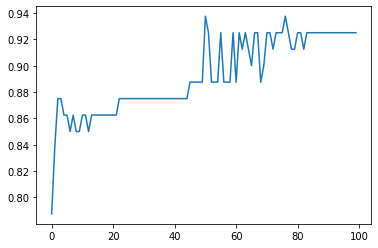

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['val_accuracy'])

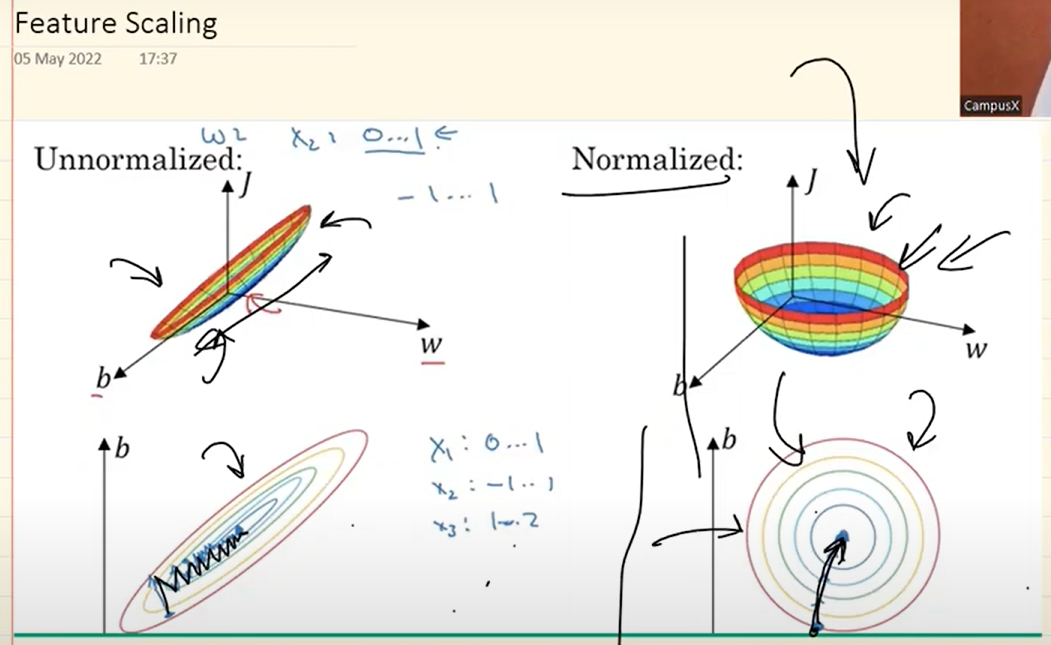

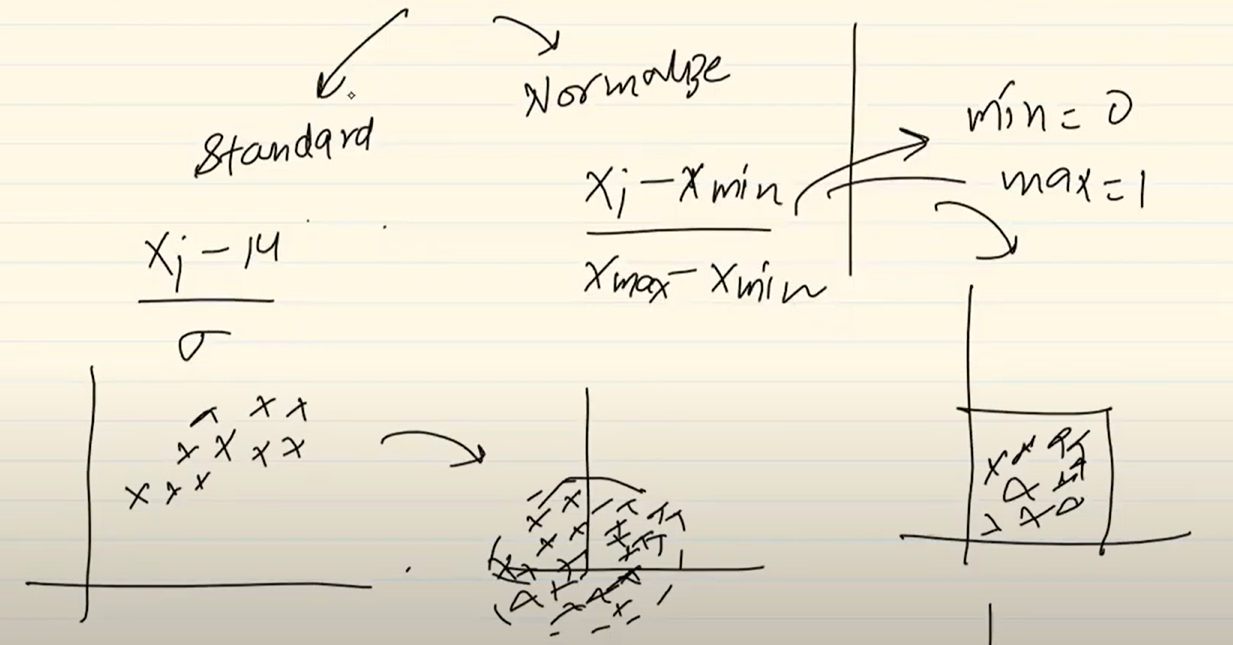